In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch, FontManager
import seaborn as sns

In [6]:
df = pd.read_csv(r"C:\Users\George\Documents\Football Analytics\Data\messibetis.csv")

In [7]:
df

,player,minute,second,x,y,type,outcome,endX,endY
0,messi,45,0,50,50,Pass,Successful,40,43
1,messi,45,25,63,48,Pass,Successful,75,83
2,messi,46,4,74,58,Pass,Successful,71,65
3,messi,46,7,76,68,Pass,Successful,95,78
4,messi,46,55,100,1,Pass,Unsuccessful,96,38
5,messi,47,42,73,25,Pass,Successful,70,54
6,messi,49,47,75,43,Pass,Unsuccessful,82,38
7,messi,50,10,79,31,Pass,Successful,87,24
8,messi,50,17,82,52,Pass,Successful,93,68
9,messi,50,24,98,62,Pass,Unsuccessful,98,61


In [8]:
df['x'] = 1.2*df['x']
df['y'] = 0.8*df['y']

In [9]:
df['endX'] = 1.2*df['endX']
df['endY'] = 0.8*df['endY']

In [10]:
df_successful = df[df['outcome'] == 'Successful']

In [11]:
df_unsuccessful = df[df['outcome'] == 'Unsuccessful']

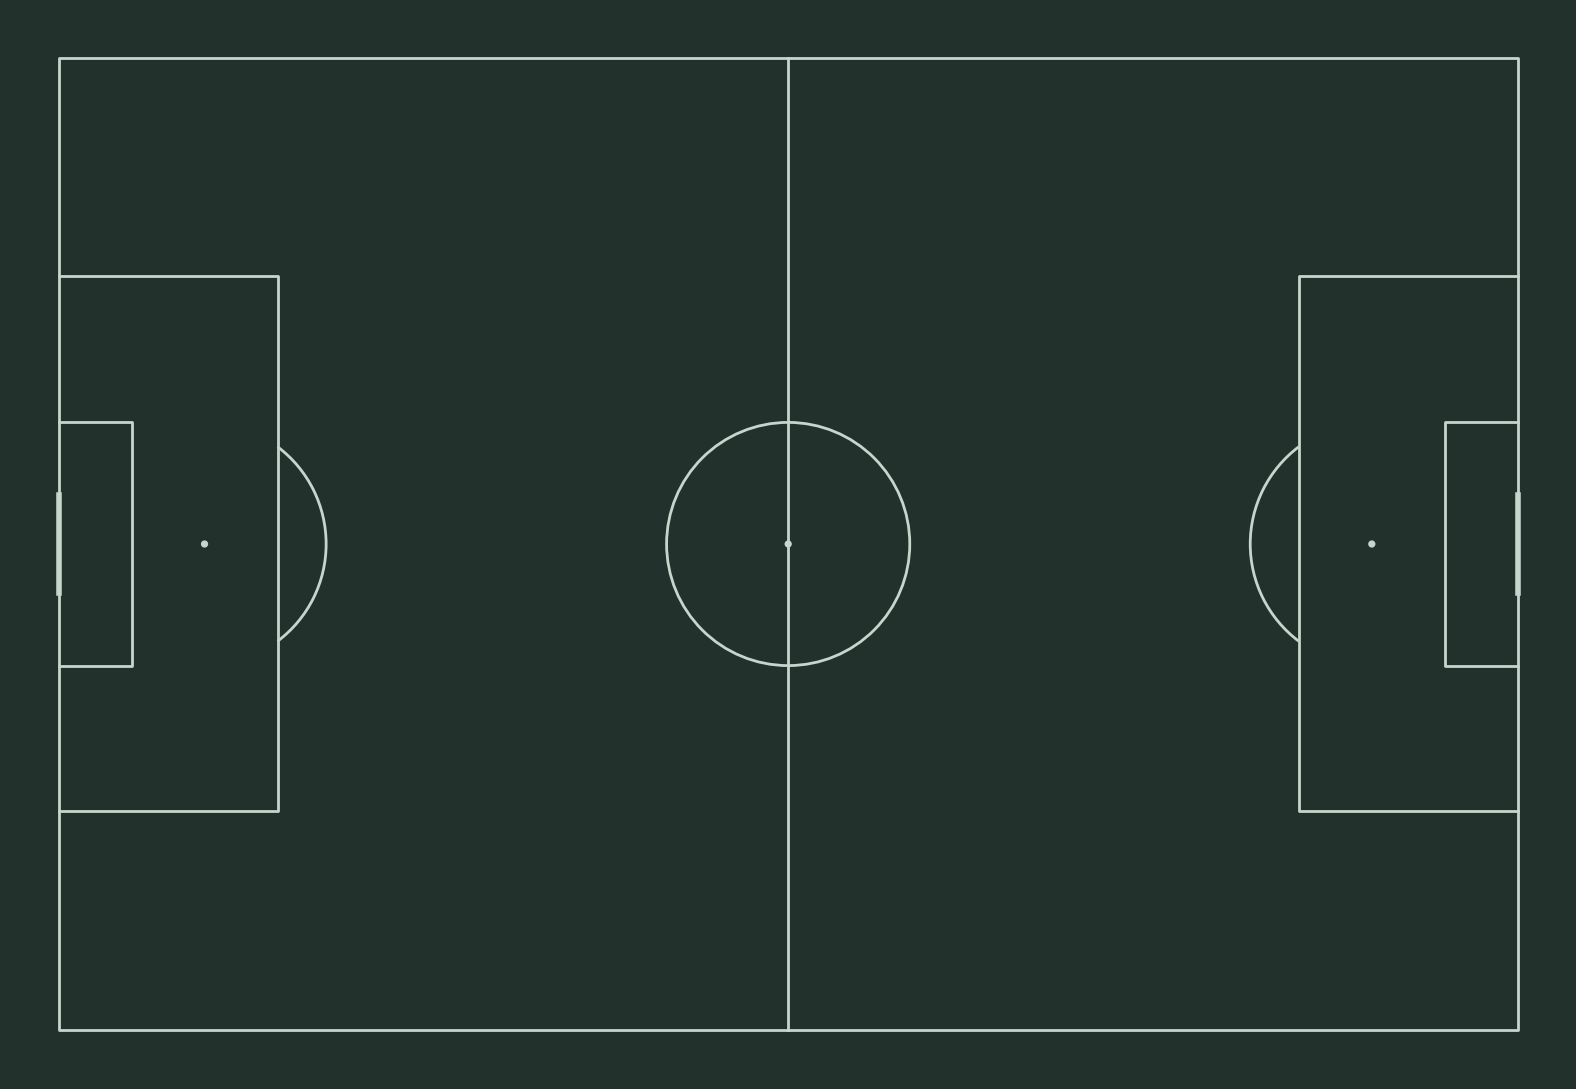

In [12]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#22312b')

c:\Users\dmsta\anaconda3\Lib\site-packages\mplsoccer\_pitch_plot.py:170: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  return sns.kdeplot(x=x, y=y, ax=ax, clip=self.kde_clip, **kwargs)


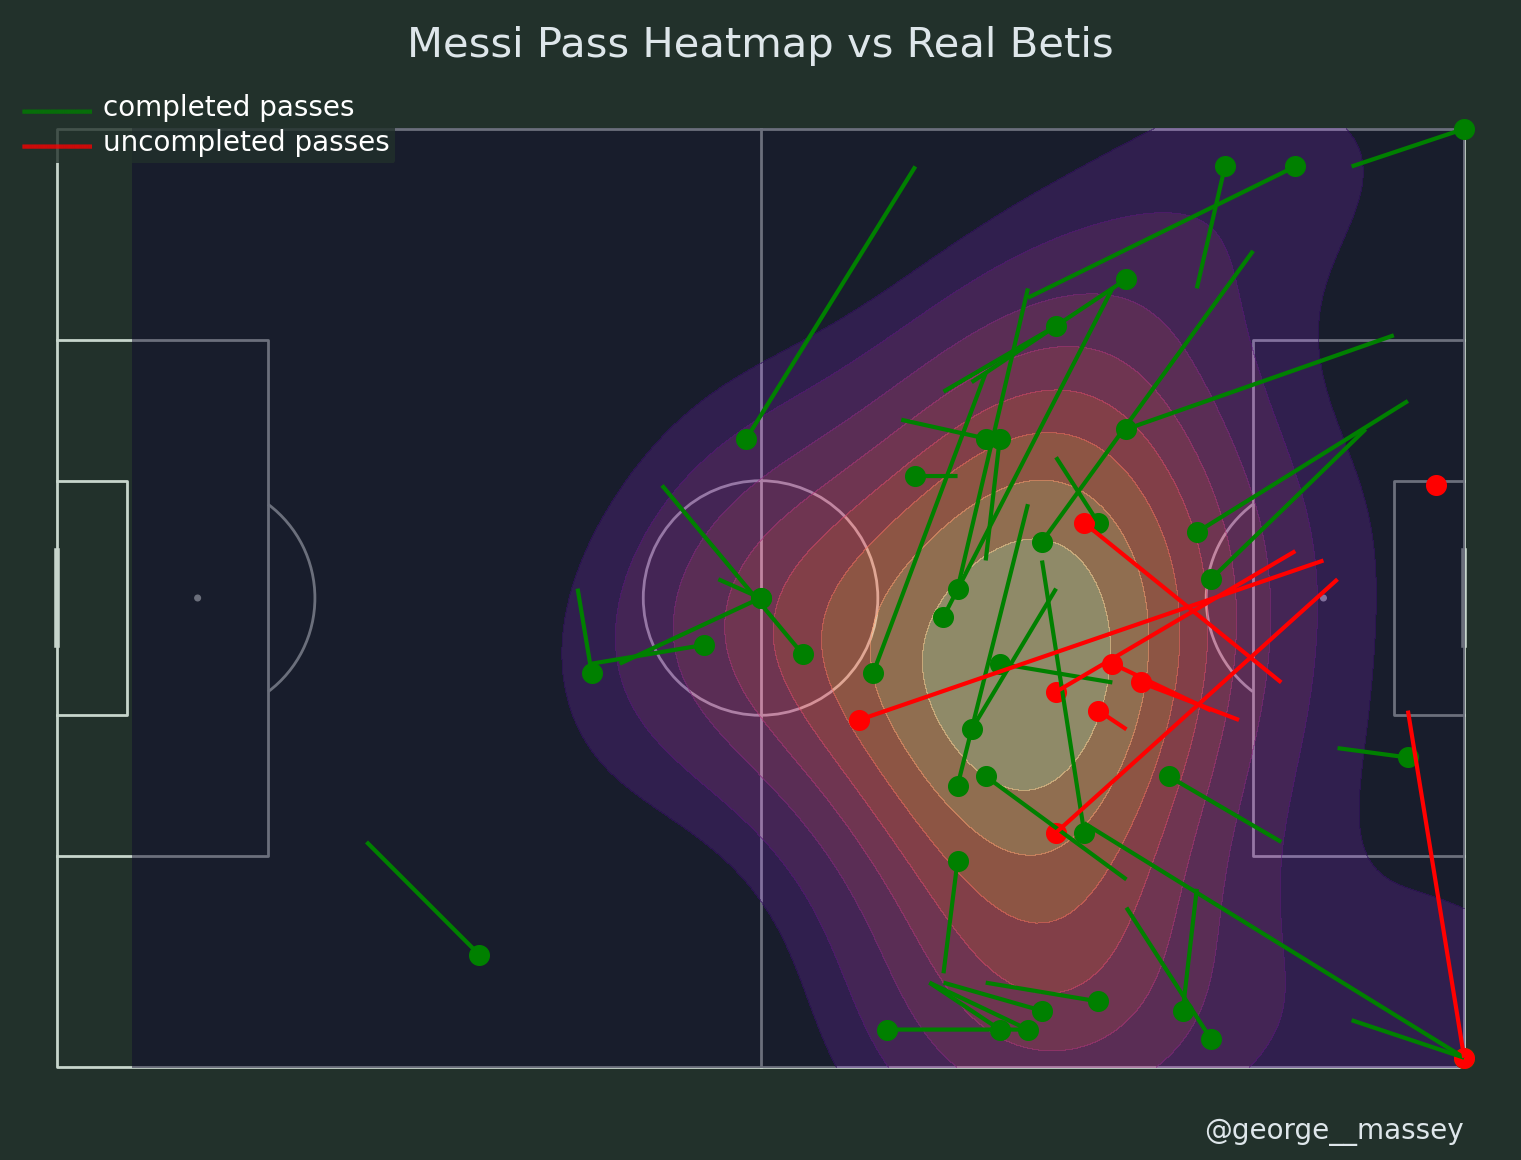

In [24]:
fig, axs = pitch.grid(endnote_height=0.03, endnote_space=0, figheight=12,
                      title_height=0.06, title_space=0,
                      axis=False,
                      grid_height=0.86)
fig.set_facecolor('#22312b')
axs['pitch'].invert_yaxis()

#Create Heatmap
kde = pitch.kdeplot(df.x,df.y,ax=axs['pitch'], shade = True, 
                    shade_lowest = True, alpha = .5, n_levels = 10,
                    cmap = 'magma')

successful_passes = pitch.lines(df_successful.x, df_successful.y,
                  df_successful.endX, df_successful.endY,
                  lw=3, label='completed passes',
                  color='green', ax=axs['pitch'])

successful_nodes = pitch.scatter(df_successful.x,df_successful.y, 
                                 ax=axs['pitch'], c = 'green', s = 200)

unsuccessful_passes = pitch.lines(df_unsuccessful.x, df_unsuccessful.y,
                  df_unsuccessful.endX, df_unsuccessful.endY,
                  lw=3, label='uncompleted passes',
                  color='red', ax=axs['pitch'])

unsuccessful_nodes = pitch.scatter(df_unsuccessful.x,df_unsuccessful.y, 
                                 ax=axs['pitch'], c = 'red', s = 200)

legend =  axs['pitch'].legend(facecolor='#22312b', handlelength=5, 
                              edgecolor='none', loc='upper left')
legend.get_texts()[0].set_color('white')
legend.get_texts()[1].set_color('white')
for text in legend.get_texts():
    text.set_fontsize(20)

axs['endnote'].text(1, 0.5, '@george__massey', va='center', ha='right', 
                    fontsize=20, color='#dee6ea')
ax_title = axs['title'].text(0.5, 0.5, f'Messi Pass Heatmap vs Real Betis', color='#dee6ea',
                             va='center', ha='center',fontsize=30)